# <u>Data Science Essentials</u>

## <u>Topic</u>: Silhouette Analysis (K-Means)

## <u>Category</u>: Model Evaluation

### <u>Created by</u>: Mohammed Misbahullah Sheriff 

- [LinkedIN](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

## Data Gathering

In [10]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

print(X.shape, y.shape)

(500, 2) (500,)


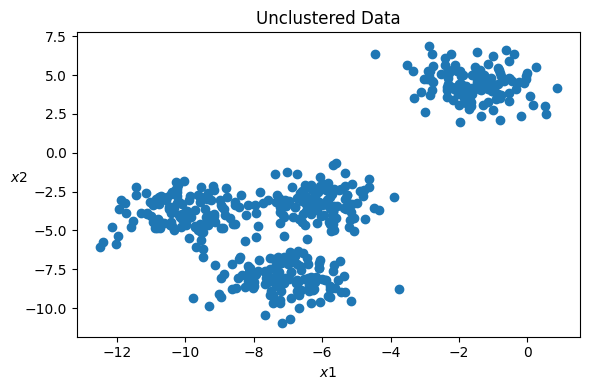

In [40]:
plt.figure(figsize=(6, 4))

plt.scatter(X[:, 0],
            X[:, 1])

plt.xlabel("$x1$")
plt.ylabel("$x2$", rotation=0)
plt.title("Unclustered Data")

plt.tight_layout()
plt.show()

## Silhouette Analysis

In [38]:
def silhouette_analysis(k_min=2, k_max=7):
    """
    Description:
    ------------
    This function will display the silhouette analysis of K-Means Clustering for 
    different values of 'K'
    
    Parameters:
    -----------
    k_min: int
           Min. value for 'K' (must be greater than 1)
    
    k_max: int
           Max. value for 'K' upto which, to perform silhouette analysis
    """
    
    if k_min < 2:
        raise ValueError("Value of k_min must be greater than 1")
        
    for k in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=k,
                        n_init="auto",
                        random_state=42)
        kmeans.fit(X, y)
        
        labels = kmeans.labels_
        clusters = kmeans.cluster_centers_
        sil_score = silhouette_score(X, labels)
        sil_samples = silhouette_samples(X, labels)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        cmap = plt.get_cmap("turbo")
        
        # 1st axes
        
        y_min = 10
        y_ticks = []
        
        for c in range(k):
            color = cmap(c / k)
            cluster = (labels == c)
            n_samples_cluster = np.sum(cluster)
            cluster_samples = sorted(sil_samples[cluster])
            
            y_upper = y_min + n_samples_cluster
            
            axes[0].fill_betweenx(x1=0,
                                  x2=cluster_samples,
                                  y=range(y_min, y_upper),
                                  color=color)
            
            y_ticks.append(int((y_min + y_upper) / 2))
            y_min = y_upper + 5
        
        axes[0].axvline(x=sil_score,
                        color="red",
                        linestyle="--")
        
        axes[0].set(title=f"Silhouette Plot (score = {sil_score:.3f})",          
                    xlabel="Silhouette Score",
                    ylabel="Cluster Label",
                    xlim=(-0.05, 1),
                    yticks=y_ticks,
                    yticklabels=range(k))
        
        # 2nd axes
        
        for c in range(k):
            color = cmap(c / k)
            cluster = (labels == c)
            
            axes[1].scatter(X[cluster, 0],
                            X[cluster, 1],
                            color=color)
        
        for k, cluster in enumerate(clusters):
            axes[1].scatter(cluster[0],
                            cluster[1],
                            marker="o",
                            color="white",
                            s=150,
                            edgecolors="black")
            
            axes[1].scatter(cluster[0],
                            cluster[1],
                            marker=f"${k}$",
                            color="black",
                            s=70)
        
        axes[1].set(title="Clustered Data",
                    xlabel="Feature 1",
                    ylabel="Feature 2")
    
        fig.suptitle(f"Silhouette Analysis for K-Means (K={k + 1})",
                     fontweight="bold",
                     fontsize=15)
    
        plt.show()

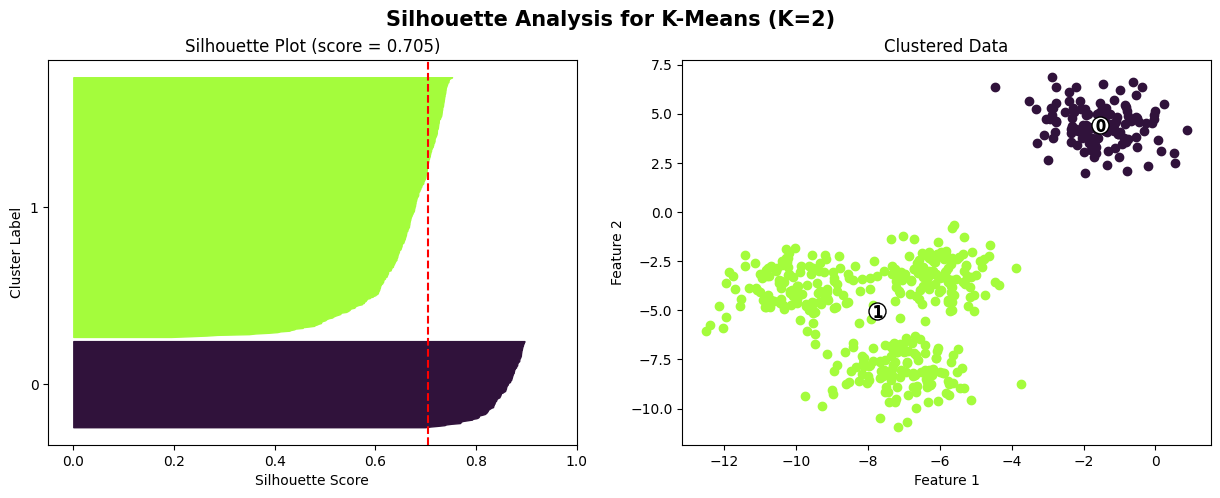

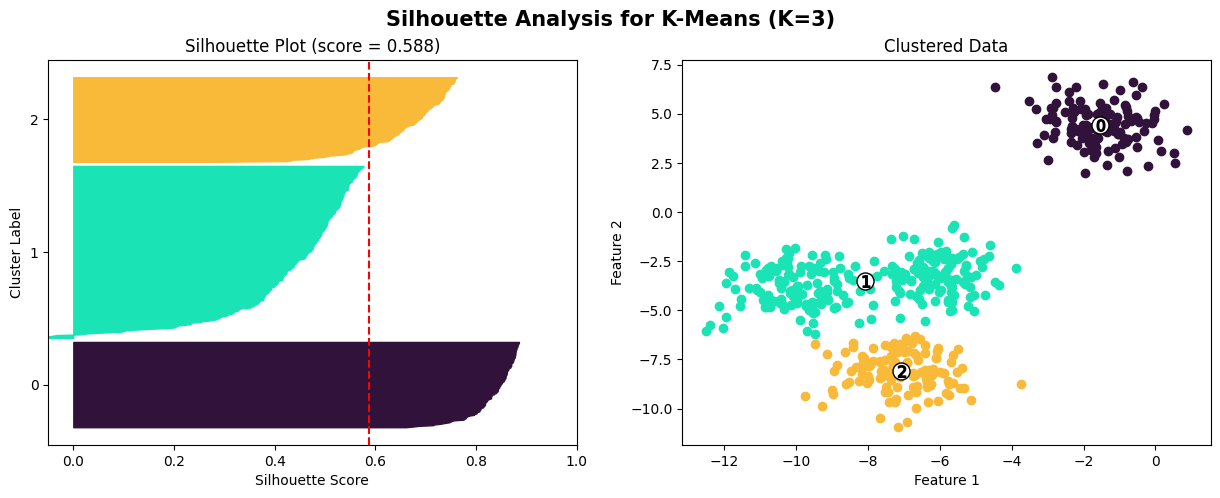

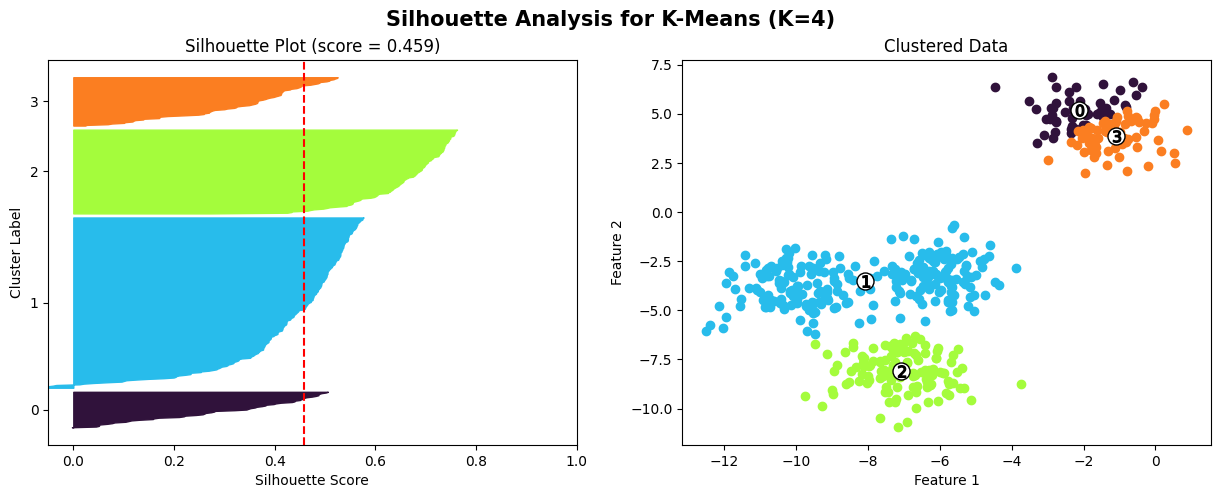

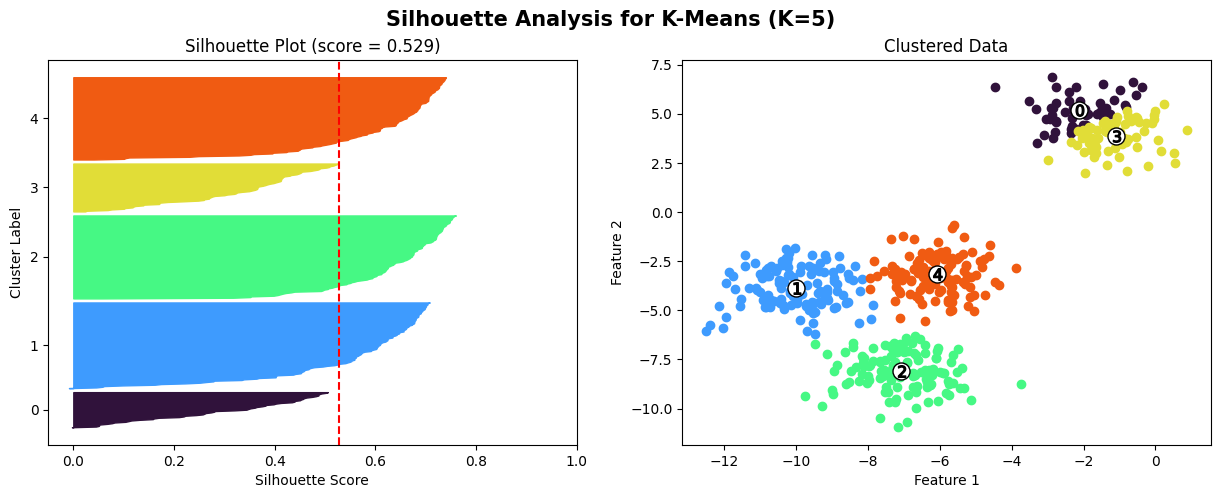

In [39]:
silhouette_analysis(k_max=5)